In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import os
import cv2

In [2]:
Data_Dir = 'C:\\Users\\Dell\\Desktop\\CVPR\\CIFAR-10-images-master\\CIFAR-10-images-master\\train\\'
Category=os.listdir(Data_Dir)

In [3]:
TRAIN_DATA = []

for c in Category:
    path = os.path.join(Data_Dir, c)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img))
        if img_arr is not None:
            img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
            TRAIN_DATA.append([img_arr, Category.index(c)])
        else:
            print(f"Failed to load image: {img}")

print(len(TRAIN_DATA))

50000


(32, 32)


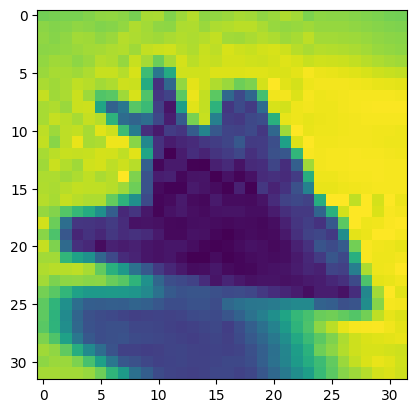

In [4]:
plt.imshow(TRAIN_DATA[0][0])
print((TRAIN_DATA[0][0]).shape)

In [ ]:
#for i in TRAIN_DATA[0:10]:
  # print(i[1])

In [6]:
print(TRAIN_DATA[0][0].shape)

(32, 32)


In [5]:
X=[]
Y=[]

for img,label in TRAIN_DATA:
    X.append(img)
    Y.append(label)
print(len(X),len(Y)) 

50000 50000


In [6]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=True)

for train_indices, test_indices in kf.split(X):
    train_set = [X[i] for i in train_indices]
    distances = []
    
    for test_img in [X[i] for i in test_indices]:
        r = []
        for train_img in train_set:
            sub = np.sum(np.abs(test_img - train_img))
            r.append(sub)
        distances.append(r)
        
    
    print(distances)